# Project 1 -- Pluto
This notebook does really everything we need to do for the Pluto project.
* read in data files and identify which are ours! 


## Read in data files.

In [218]:
# import functions 
from astropy.io import fits

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors


import numpy as np

In [219]:
# full path where my cool data files are located
full_path = '/Users/diana/School/Fall2021/ASTR257/data-2021-09-19-nickel-Andrew.Skemer'

# exact file number
num = '1201' #1201 previously

# open fits file
hdu = fits.open(f'{full_path}/d{num}.fits')

# data
data = hdu[0].data

65535


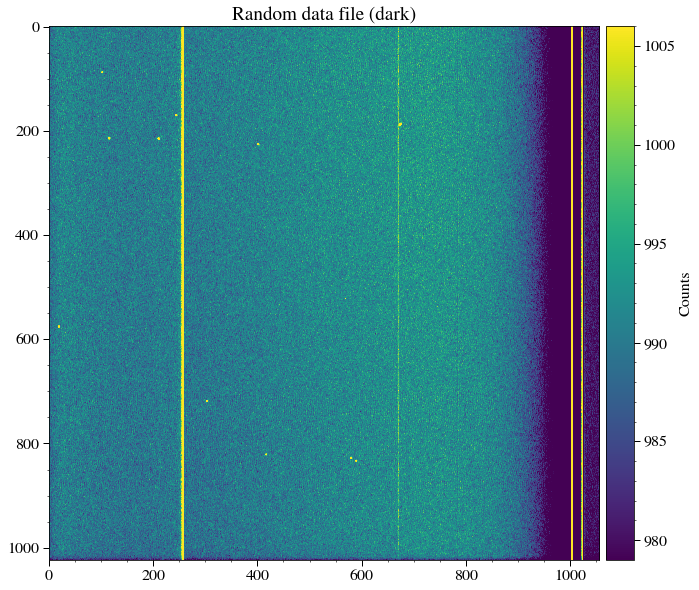

In [220]:
# style and size 
plt.style.use('jamie')
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(data, vmin = np.percentile(data, 10), vmax = np.percentile(data, 99))

# set title 
plt.title('Random data file (dark)')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

print(np.max(data))

In [221]:
# Now, need to verify if our integration times are all the same? 
# our science images and dark flats are the same integration time, which is great. 
# biases don't need to be 

In [222]:
# store all our data to read later on
biases_ints = np.arange(1086, 1106) # list of file names corresponding to biases "dark" in obs log (ugh, I know)
biases = [f'd{str(bias)}.fits' for bias in biases_ints] # file names of biases

darks_ints = np.arange(1200, 1210) # list of file names corresponding to darks "lond_dark" in obs log
darks = [f'd{str(dark)}.fits' for dark in darks_ints] # file names of darks

flats_ints = np.arange(1129, 1134) # list of file names corresponding to sky flats "sky_flat" in obs log 
flats = [f'd{str(flat)}.fits' for flat in flats_ints] # file names of flats 

science_ints = np.arange(1165, 1175) # list of file names corresponding to science "science" in obs log
science = [f'd{str(sc)}.fits' for sc in science_ints]

In [223]:
# compute a "median dark" image, with the median value of all the darks in each pixel
# I really feel like I'm just forgetting everything. 

# open up all my darks! 
darks_fits = [fits.open(f'{full_path}/{file}') for file in darks]
darks_data = [darks[0].data.astype('float') for darks in darks_fits]

In [224]:
# take the median of darks 
med_dark = np.median(darks_data, axis = 0)

The median count on the dark images is: 991.0


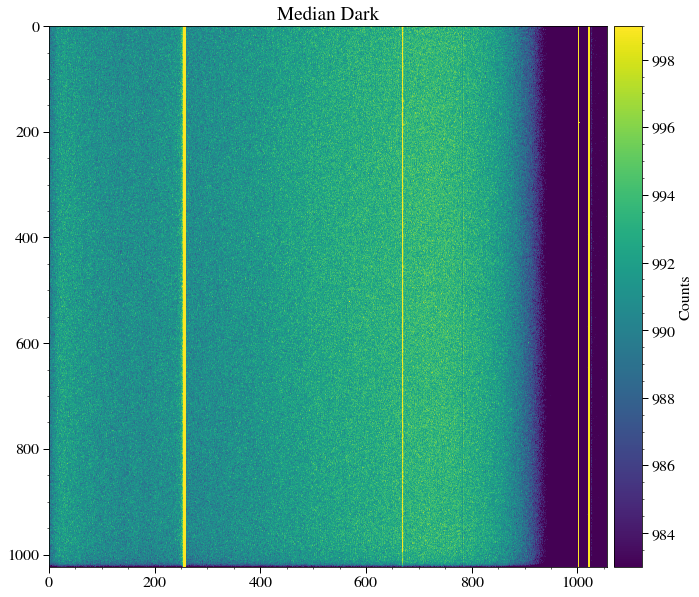

In [225]:
# plot the median of the darks
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(med_dark, vmin = np.percentile(med_dark, 10), vmax = np.percentile(med_dark, 99)) # norm = mcolors.LogNorm(vmin = 0.1, vmax = np.nanmax(data)))

# set title 
plt.title('Median Dark')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

# as a sanity check, calculate the median over all the data
median_value_darks = np.median(darks_data)
print(f'The median count on the dark images is: {median_value_darks}')

In [226]:
# compute the "median bias" image, with the median of all the biases in each pixel

# open up all my biases! 
biases_fits = [fits.open(f'{full_path}/{file}') for file in biases]
biases_data = [bias[0].data.astype('float') for bias in biases_fits]

In [227]:
# take the median of biases 
med_bias = np.median(biases_data, axis = 0)

The median count on the bias images is: 1007.0


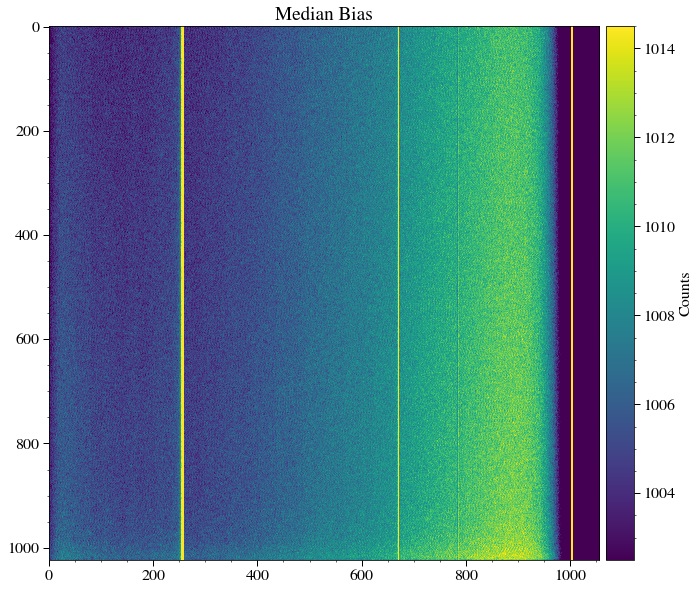

In [228]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(med_bias, vmin = np.percentile(med_bias, 10), vmax = np.percentile(med_bias, 99))

# set title 
plt.title('Median Bias')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

# as a sanity check, calculate the median over all the data
median_value_biases = np.median(biases_data)
print(f'The median count on the bias images is: {median_value_biases}')

In [229]:
# Create Master Dark image
# Subtract (median) bias frames from dark frames, (or in reverse?)
# divide by integration time to make into a per second image 
master_dark = (med_dark - med_bias) / 25 # exposure time of 25 seconds

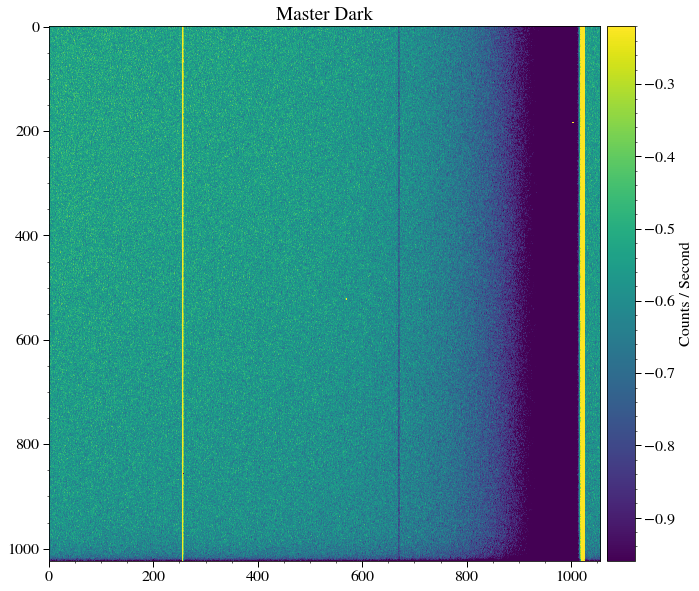

In [230]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(master_dark, vmin = np.percentile(master_dark, 10), vmax = np.percentile(master_dark, 99))

# set title 
plt.title('Master Dark')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts / Second')


plt.tight_layout()

In [231]:
# median them all together before actually doing any of the callibration
# with the flat frames, there are some crazy ones so you can take the mean (and hope there are no cosmic rays)
# or alternatively, you can scale each of them after you've removed the darks and biases from them

In [232]:
# compute the "mean flat" image, with the median of all the field in each pixel

# open up all my flats! 
flats_fits = [fits.open(f'{full_path}/{file}') for file in flats]
flats_data = [flat[0].data.astype('float') for flat in flats_fits]

In [236]:
# take the mean of flats
# upon visual inspection, sky flats have no crazy features like cosmic rays! Hence, taking the mean. 
# the twilight flats themselves don't vary a whole ton where I define a whole ton as ~20% from one another
# mean_flat = np.mean(flats_data, axis = 0)

In [ ]:
# normalize flats before median combining them
# THIS IS WHERE I AM HAVING TROUBLE NORMALIZING, BUT I THINK I AM ON THE RIGHT TRACK. 
# I WILL BE NORMALIZING THE DATA USING MIN MAX FEATURE SCALING, WHERE MY MIN AND MAX ARE
# np.percentile (data, 10) and np.percentile (data, 99) to exclude crazy wild outliers
# might change percentiles later after I test this out. 
norm_flats_data = [(flat - np.percentile(mean_flat, 10)) for flat in flats_data ]

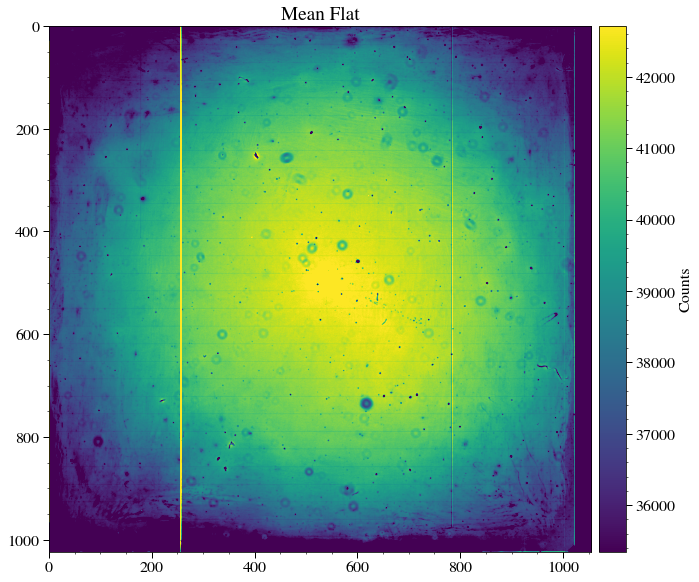

In [234]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(mean_flat, vmin = np.percentile(mean_flat, 10), vmax = np.percentile(mean_flat, 99))

# set title 
plt.title('Mean Flat')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

In [235]:
# subtract (master) dark frame and divide by integration time
# to make into a per second image
#master_flat = ((mean_flat) - master_dark) / 25 
master_flat = (((mean_flat - med_bias) / 25) - master_dark)/np.mean()
#master_flat = (( (mean_flat)/np.mean(mean_flat)) - master_dark) / 25 
# flat_field_master[4, :] = ((loop_img-bias_median)/10) - dark_median

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

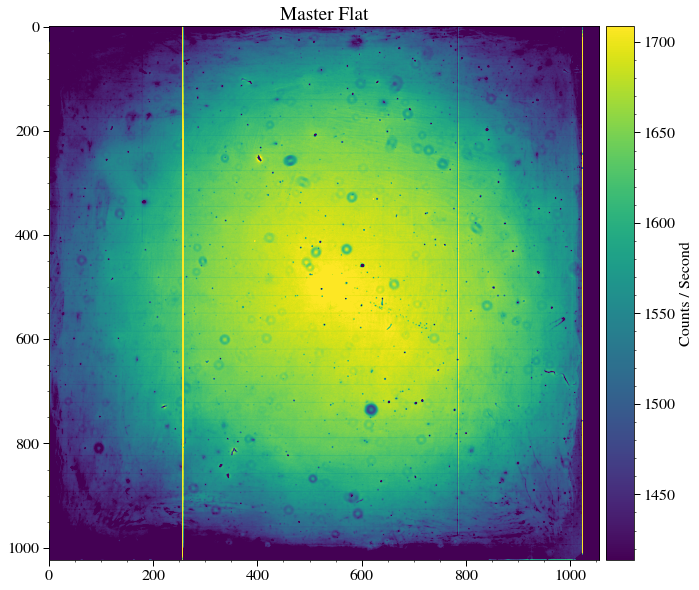

In [200]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(master_flat, vmin = np.percentile(master_flat, 10), vmax = np.percentile(master_flat, 99))

# set title 
plt.title('Master Flat')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts / Second')


plt.tight_layout()

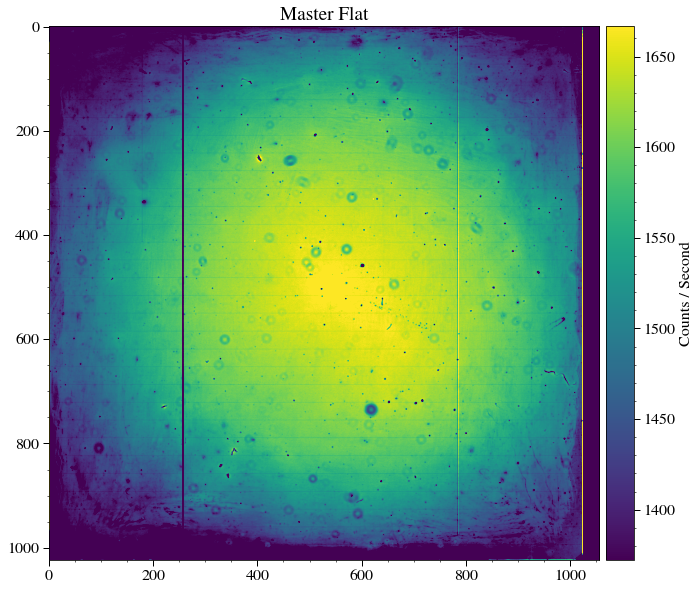

In [211]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(master_flat, vmin = np.percentile(master_flat, 10), vmax = np.percentile(master_flat, 99))

# set title 
plt.title('Master Flat')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts / Second')


plt.tight_layout()

In [212]:
# make science frames 
# compute the "median science" image, with the median of all the science in each pixel

# open up all my science! 
science_fits = [fits.open(f'{full_path}/{file}') for file in science]
science_data = [sc[0].data.astype('float') for sc in science_fits]

In [213]:
# take the median of science 
med_science = np.median(science_data, axis = 0)

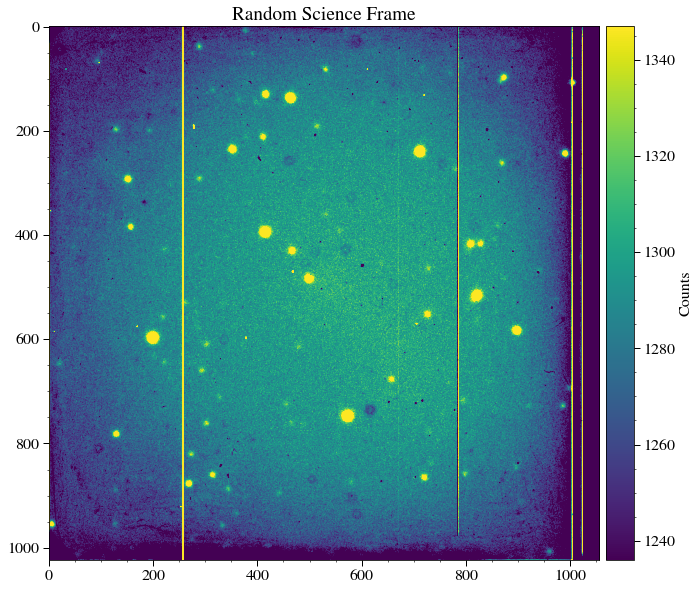

In [214]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(science_data[0], vmin = np.percentile(science_data[0], 10), vmax = np.percentile(science_data[0], 99))

# set title 
plt.title('Random Science Frame')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

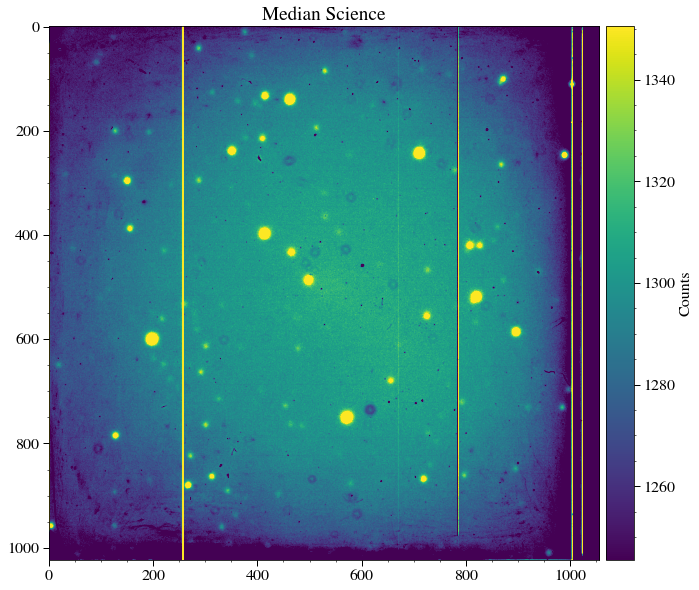

In [215]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(med_science, vmin = np.percentile(med_science, 10), vmax = np.percentile(med_science, 99))

# set title 
plt.title('Median Science')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Counts')


plt.tight_layout()

# ok, the following looks a lot less noisy! 

In [216]:
# subtract bias frame, divide by integration time to make a per second image 
# subtract dark image, divide by flat field
master_science = (((med_science - med_bias) / 25) - master_dark) / master_flat
#master_science = (med_science - master_dark)/ (master_flat - master_dark)

<ipython-input-216-d0a3613f8e14>:3: RuntimeWarning: divide by zero encountered in true_divide
  master_science = (((med_science - med_bias) / 25) - master_dark) / master_flat
<ipython-input-216-d0a3613f8e14>:3: RuntimeWarning: invalid value encountered in true_divide
  master_science = (((med_science - med_bias) / 25) - master_dark) / master_flat


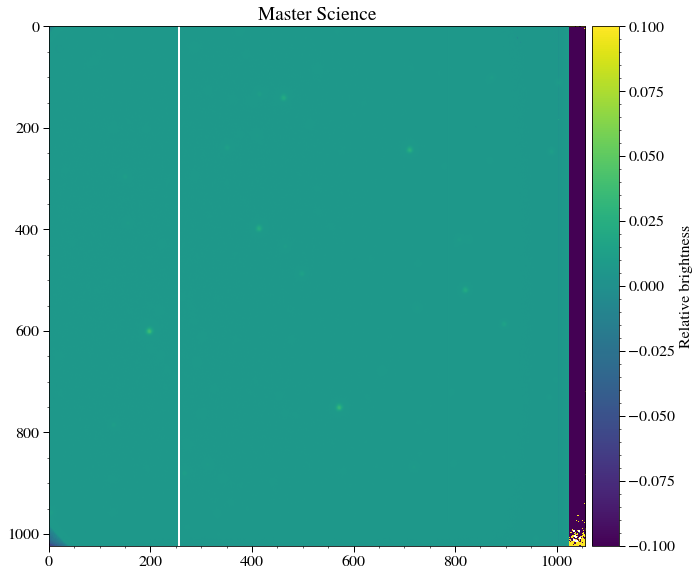

In [217]:
# plot the median of the biases
plt.figure(figsize = (10,10))

# actual image and axes
ax = plt.gca()
im = plt.imshow(master_science, vmin = np.percentile(master_science, 10), vmax = np.percentile(master_science, 99))

# set title 
plt.title('Master Science')

# color bar
div = make_axes_locatable(ax) 
cbax = div.append_axes('right', size = '5%', pad = 0.1)
cb = plt.colorbar(im, cax = cbax, label = 'Relative brightness')


plt.tight_layout()

#fits.writeto('master_science_test.fits.fits', master_science )
# ok, the following looks a lot less noisy! 